## Семинар : "Обучение с подкреплением"

###  FrozenLake


<img src="http://vignette2.wikia.nocookie.net/riseoftheguardians/images/4/4c/Jack's_little_sister_on_the_ice.jpg/revision/latest?cb=20141218030206" alt="a random image to attract attention" style="width: 400px;"/>



In [9]:
!pip install gym
!pip install "gym[toy_text]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:01:01


In [1]:
import matplotlib.pyplot as plt
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output

import gym
import numpy as np 
from gym.envs.toy_text.frozen_lake import generate_random_map

#create a single game instance
env = gym.make("FrozenLake-v1", map_name="8x8", render_mode="rgb_array", is_slippery=True)

#start new game
env.reset();

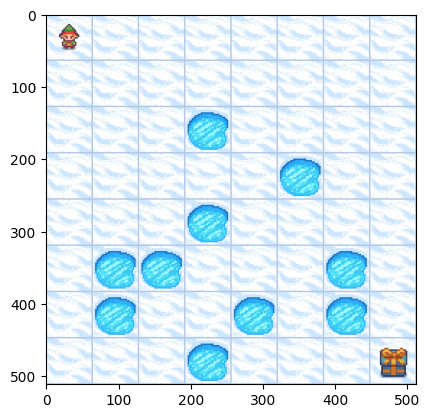

In [2]:
# display the game state
plt.imshow(env.render())

### legend

![img](https://cdn-images-1.medium.com/max/800/1*MCjDzR-wfMMkS0rPqXSmKw.png)

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it for now

initial observation code: (0, {'prob': 1})
printing observation:
observations: Discrete(64) n= 64
actions: Discrete(4) n= 4


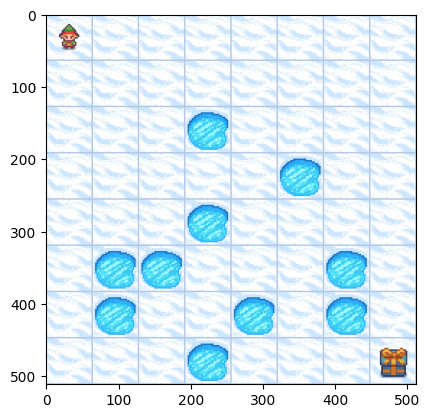

In [33]:
print("initial observation code:", env.reset())
print('printing observation:')
plt.imshow(env.render())
print("observations:", env.observation_space, 'n=', env.observation_space.n)
print("actions:", env.action_space, 'n=', env.action_space.n)

taking action 2 (right)
new observation code: 26
reward: 0.0
is game over?: False
printing new state:


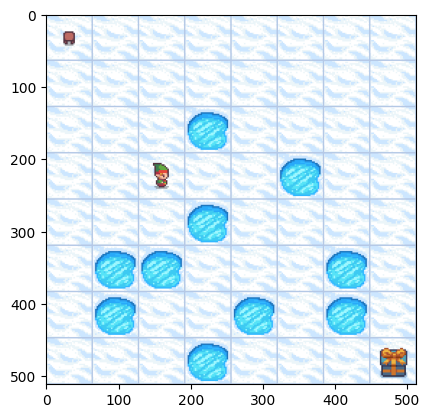

In [8]:
print("taking action 2 (right)")
new_obs, reward, is_done, _, _ = env.step(2)
print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)
print("printing new state:")
plt.imshow(env.render())

In [6]:
action_to_i = {
    'left':0,
    'down':1,
    'right':2,
    'up':3
}

### Попробуйте походить по замерзшему озеру, не упав в дырку. 
* Каждый шаг вы с вероятностью __0.5__ будете двигаться в выбранном направлении и с вероятностью __0.5__ в случайном.
* Если упадете, используйте __env.reset()__ чтобы перезапустить __env__

In [47]:
env.reset()

0

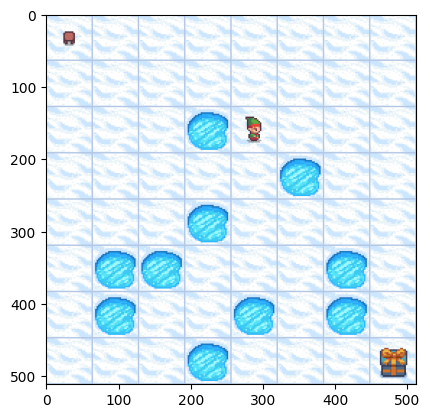

In [49]:

env.step(action_to_i['right'])
plt.imshow(env.render())

## Алгоритм Policy iteration


In [18]:
def run_episode(env, policy, gamma = 1.0, render = False):
    obs = env.reset()[0]
    total_reward = 0
    step_idx = 0
    #reward = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _, _ = env.step(int(policy[obs]))

        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [10]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

In [11]:

def extract_policy(v, gamma = 1.0):
    policy = np.zeros(env.observation_space.n)
    q = np.zeros((env.observation_space.n, env.action_space.n))
    for S in env.env.P.keys():
        for a in env.env.P[S].keys():
            for p, s, r, _ in env.env.P[S][a]:
                q[S, a] += p * r + p * gamma * v[s]
        policy[S] = np.argmax(q[S, :])
    return policy

In [12]:

def compute_policy_v(env, policy, gamma=1.0):
    v_cur = np.zeros(env.observation_space.n)
    while True:
        v_prev = v_cur.copy()
        for S in range(env.observation_space.n):
            v_cur[S] = np.sum([p * (r + gamma * v_prev[s]) 
                               for p, s, r, _ in env.env.P[S][policy[S]]])
        if np.linalg.norm(v_cur - v_prev) < 1e-10:
            break
    return v_cur

In [13]:
def policy_iteration(env, gamma = 1.0):
    policy = np.random.choice(np.arange(env.action_space.n), env.observation_space.n)
    max_iterations = 1000
    
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            break

        policy = new_policy
    return policy

In [14]:
i2action = {
    0:'left',
    1:'down',
    2:'right',
    3:'up'
}

In [101]:
for i in range(8):
    print([i2action[action] for action in optimal_policy[8 * i: 8 * (i+1)]])

['left', 'left', 'left', 'left', 'left', 'left', 'left', 'right']
['left', 'up', 'left', 'left', 'left', 'right', 'down', 'up']
['left', 'left', 'left', 'left', 'left', 'left', 'left', 'left']
['down', 'down', 'down', 'down', 'down', 'down', 'down', 'down']
['up', 'right', 'right', 'up', 'up', 'up', 'right', 'up']
['up', 'up', 'up', 'left', 'left', 'left', 'left', 'left']
['up', 'up', 'up', 'left', 'left', 'left', 'right', 'down']
['left', 'left', 'right', 'left', 'left', 'left', 'right', 'left']


0.84


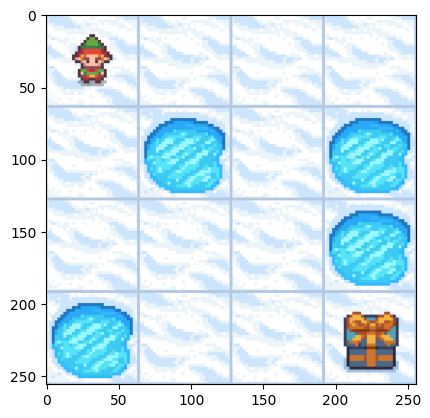

In [19]:
gamma = 1.0
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=True)
env.reset()
plt.imshow(env.render())
optimal_policy = policy_iteration(env, gamma=gamma)
policy_score = evaluate_policy(env, optimal_policy, gamma, n=100)

print(policy_score)

In [20]:
for i in range(4):
    print([i2action[action] for action in optimal_policy[4 * i: 4 * (i+1)]])

['left', 'up', 'up', 'up']
['left', 'left', 'left', 'left']
['up', 'down', 'left', 'left']
['left', 'right', 'down', 'left']


In [ ]:
gamma = 1.0
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=True, desc=generate_random_map(size=8))
env.reset()
plt.imshow(env.render())
optimal_policy = policy_iteration(env, gamma=gamma)
policy_score = evaluate_policy(env, optimal_policy, gamma, n=100)

print(policy_score)